In [67]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np

In [68]:
df = pd.read_csv("timeseries.csv")
print(df.head())          # Preview first rows
print(df.describe())      # Summary statistics

   generation  fitness_mean   fitness_std  fitness_std  fitness_se  \
0           0      1.000000      0.000000     0.000000           0   
1           1      0.932349      0.168260     0.008413           0   
2           2      0.865955      0.203285     0.010164           0   
3           3      0.797451      0.239277     0.011964           0   
4           4      0.758630      0.246992     0.012350           0   

   unstable_states  perc_unstable  path_mean  path_std  path_se  
0              0.0        25.0000   0.000000  0.000000      NaN  
1              0.0        19.7400   7.673161  0.383658      NaN  
2              0.0        14.2900   8.307581  0.415379      NaN  
3              0.0        10.9000   7.585183  0.379259      NaN  
4              0.0         8.2325   6.092491  0.304625      NaN  
       generation  fitness_mean   fitness_std  fitness_std  fitness_se  \
count  401.000000    401.000000    401.000000   401.000000  401.000000   
mean   200.000000      0.899425    

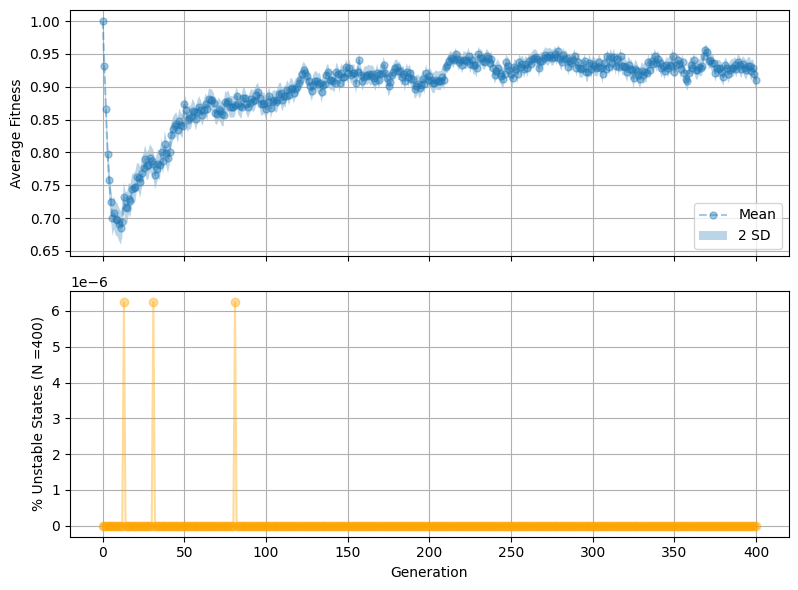

In [69]:
generations = df['generation']
avg_fitness = df['fitness_mean']
std_fitness = df['fitness_std']
n_nets = 400
unstable_states = df['unstable_states']
perc_unstable = unstable_states / n_nets

fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Plot 1: Average Fitness with Standard Error
axes[0].plot(generations, avg_fitness, label='Mean', linestyle = '--', marker = 'o', markersize = 5, alpha = 0.4)
axes[0].fill_between(
    generations,
    avg_fitness - 2*std_fitness,
    avg_fitness + 2*std_fitness,
    alpha=0.3,
    label='2 SD'
)
axes[0].set_ylabel("Average Fitness")
axes[0].legend()
axes[0].grid(True)

# Plot 2: Number of Unstable States
axes[1].plot(generations, perc_unstable, label='% Unstable States', marker='o', color='orange', alpha = 0.4)
axes[1].set_xlabel("Generation")
axes[1].set_ylabel(f"% Unstable States (N ={n_nets})")
axes[1].grid(True)

plt.tight_layout()
plt.show()


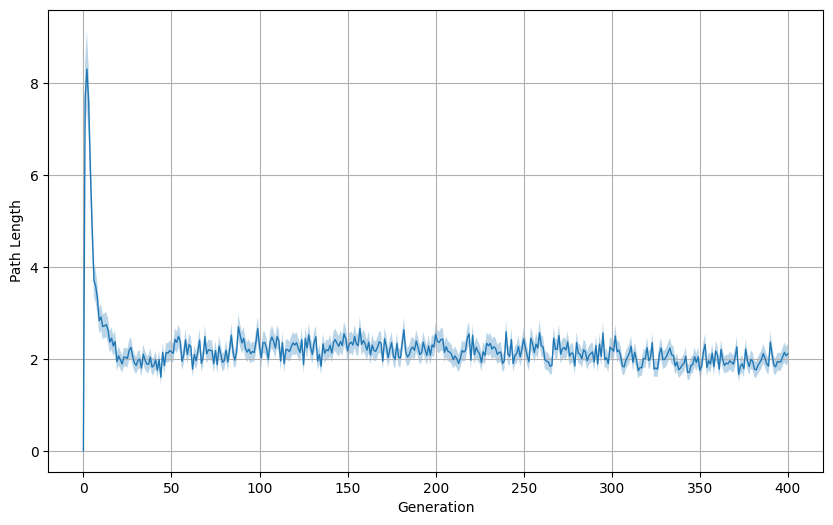

In [80]:
path_mean = df['path_mean']
path_std = df['path_std']


plt.figure(figsize = (10,6))
plt.plot(generations, df['path_mean'], linewidth = 1)
plt.fill_between(
    generations,
    path_mean + 2 * path_std,
    path_mean - 2 * path_std,
    alpha=0.3,
    label='2 SD'
)

plt.xlabel('Generation')
plt.ylabel('Path Length')
plt.grid(True)


In [71]:
# Before vs after evolution

df_comparison = pd.read_csv("initial_final.csv")
print(df_comparison.head())
print(df_comparison.describe())

   mean_path_initial  std_path_initial  se_path_initial  mean_path_final  \
0               25.0               0.0              0.0           3.5800   
1                9.0               0.0              0.0           3.8100   
2                9.0               0.0              0.0           3.4800   
3               16.0               0.0              0.0           2.2900   
4                4.0               0.0              0.0           2.5425   

   std_path_final  se_path_final  perc_completion_initial  \
0        2.110355       0.667353                      1.0   
1        2.398729       0.758545                      1.0   
2        2.016085       0.637542                      1.0   
3        1.637345       0.517774                      1.0   
4        2.216573       0.700942                      1.0   

   perc_completion_final  mutation_stability_initial  mutation_stability_final  
0                    1.0                     0.19750                   0.87850  
1             

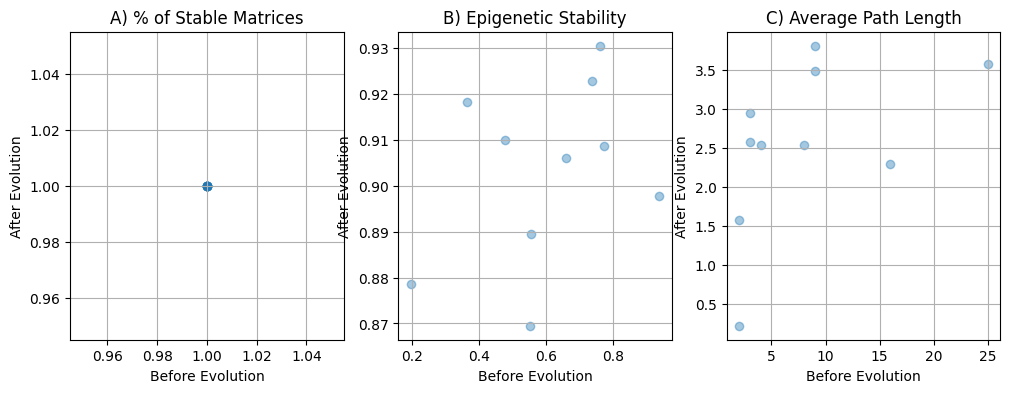

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Percentage of completion

init_perc = df_comparison['perc_completion_initial']
final_perc = df_comparison['perc_completion_final']

axes[0].scatter(init_perc, final_perc, alpha = 0.4)
axes[0].set_title("A) % of Stable Matrices")
axes[0].set_xlabel("Before Evolution")
axes[0].set_ylabel("After Evolution")
# axes[0].set_xlim(-0.1, 1.1)
# axes[0].set_ylim(-0.1, 1.1)
axes[0].grid(True)
# Stability

init_mutation = df_comparison['mutation_stability_initial']
final_mutation = df_comparison['mutation_stability_final']

axes[1].scatter(init_mutation, final_mutation, alpha = 0.4)
axes[1].set_title("B) Epigenetic Stability")
axes[1].set_xlabel("Before Evolution")
axes[1].set_ylabel("After Evolution")
# axes[1].set_xlim(-.01, 0.2)
# axes[1].set_ylim(0.65, 1.0)
axes[1].grid(True)
# Average (complete) path length

init_avg_path = df_comparison["mean_path_initial"]
final_avg_path = df_comparison["mean_path_final"]

axes[2].scatter(init_avg_path, final_avg_path, alpha = 0.4)
axes[2].set_title("C) Average Path Length")
axes[2].set_xlabel("Before Evolution")
axes[2].set_ylabel("After Evolution")
# axes[2].set_xlim(-0.1,12.1)
# axes[2].set_ylim(-0.1,12.1)

axes[2].grid(True)

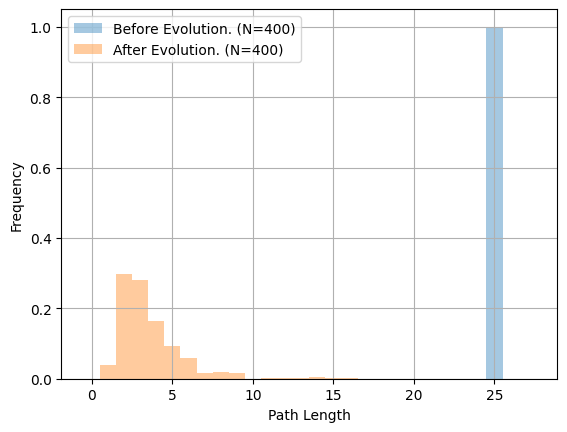

In [76]:
# Distribution of (completed) path lengths

df_dists = pd.read_csv("distributions.csv")
plt.hist(df_dists['path_initial'], density = True, alpha = 0.4, bins=np.arange(0, 28 + 1) - 0.5, label = f"Before Evolution. (N={df_dists['path_initial'].count()})")
plt.hist(df_dists['path_final'], density = True, alpha = 0.4, bins=np.arange(0, 28 + 1) - 0.5, label = f"After Evolution. (N={df_dists['path_final'].count()})")
plt.xlabel("Path Length")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show();
